## Thoracic Surgery for Lung Cancer

Lung cancer is the leading cause of cancer-related deaths in the world. In the United States, lung cancer claims more lives every year than colon cancer, prostate cancer, and breast cancer combined.

The American Cancer Society’s estimates for lung cancer in the United States for 2019 are:

About 228,150 new cases of lung cancer (116,440 in men and 111,710 in women)
About 142,670 deaths from lung cancer (76,650 in men and 66,020 in women)
Despite the very serious prognosis (outlook) of lung cancer, some people with earlier stage cancers are cured. More than 430,000 people alive today have been diagnosed with lung cancer at some point.

#### Abstract

The data is dedicated to classification problem related to the post-operative life expectancy in the lung cancer patients: class 1 - death within one year after surgery, class 2 - survival.

#### Data Set Information

The data was collected retrospectively at Wroclaw Thoracic Surgery Centre for patients who underwent major lung resections for primary lung cancer in the years 2007-2011. The Centre is associated with the Department of Thoracic Surgery of the Medical University of Wroclaw and Lower-Silesian Centre for Pulmonary Diseases, Poland, while the research database constitutes a part of the National Lung Cancer Registry, administered by the Institute of Tuberculosis and Pulmonary Diseases in Warsaw, Poland.

In [5]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

##### Loading the dataset

In [108]:
df = pd.read_csv("csv_result-ThoraricSurgery.csv")
df.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


##### Removing the id column

In [109]:
df.drop(columns='id',inplace=True)
df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


##### Renaming the columns as per the description

In [110]:
df.rename(columns = {'DGN': 'Diagnosis','PRE4':'FVC','PRE5':'FEV1','PRE6':'Performance','PRE7':'Pain','PRE8':'Haemoptysis','PRE9':'Dyspnoea',
                    'PRE10':'Cough','PRE11':'Weakness','PRE14':'Tumor_Size','PRE17':'Diabetes_Mellitus','PRE19':'MI_6mo','PRE25':'PAD','PRE30':'Smoking','PRE32':'Asthma','AGE':'Age','Risk1Yr':'Death_1yr'},inplace=True)
df.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


##### Replacing the values True-False to 1-0

In [111]:
df.replace(['F','T'],[0,1],inplace=True)

##### Removing the characters like 'DGN','OC','PRZ' from the columns 

In [112]:
df.Diagnosis.replace({'DGN':''},regex=True,inplace=True)

In [113]:
df.Tumor_Size.replace({'OC1':''},regex=True,inplace=True)

In [114]:
df.Performance.replace({'PRZ':''},regex=True,inplace=True)

In [115]:
df.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


##### Checking the data types of columns

In [116]:
df.dtypes

Diagnosis             object
FVC                  float64
FEV1                 float64
Performance           object
Pain                   int64
Haemoptysis            int64
Dyspnoea               int64
Cough                  int64
Weakness               int64
Tumor_Size            object
Diabetes_Mellitus      int64
MI_6mo                 int64
PAD                    int64
Smoking                int64
Asthma                 int64
Age                    int64
Death_1yr              int64
dtype: object

##### Changing data types of Diagnosis,Performance,Tumor_size from string to int64

In [117]:
df1 = df.astype({'Diagnosis':'int64','Performance':'int64','Tumor_Size':'int64'})

In [125]:
df1.dtypes

Diagnosis              int64
FVC                  float64
FEV1                 float64
Performance            int64
Pain                   int64
Haemoptysis            int64
Dyspnoea               int64
Cough                  int64
Weakness               int64
Tumor_Size             int64
Diabetes_Mellitus      int64
MI_6mo                 int64
PAD                    int64
Smoking                int64
Asthma                 int64
Age                    int64
Death_1yr              int64
dtype: object

##### Checking for Outliers

The only numeric columns that could contain outliers are Age,FEV1, FVC

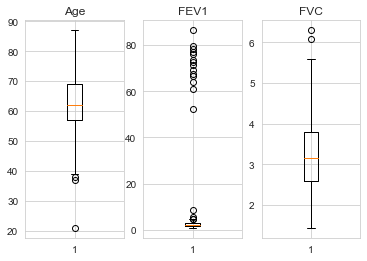

In [133]:
fig, axs = plt.subplots(1,3)

axs[0].boxplot(df1.Age)
axs[0].set_title('Age')

axs[1].boxplot(df1.FEV1)
axs[1].set_title('FEV1')

axs[2].boxplot(df1.FVC)
axs[2].set_title("FVC")
plt.show()

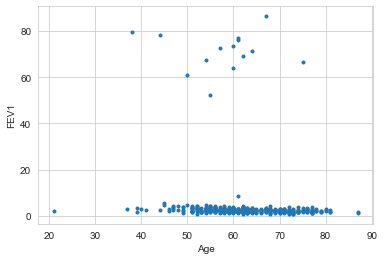

In [137]:
plt.plot(df1.Age, df1.FEV1, linestyle='none', marker='.')
plt.xlabel('Age')
plt.ylabel('FEV1')
plt.show()

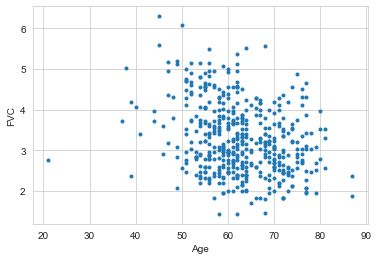

In [138]:
plt.plot(df1.Age, df1.FVC, linestyle='none', marker='.')
plt.xlabel('Age')
plt.ylabel('FVC')
plt.show()

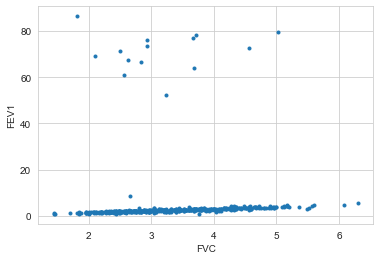

In [139]:
plt.plot(df1.FVC, df1.FEV1, linestyle='none', marker='.')
plt.xlabel('FVC')
plt.ylabel('FEV1')
plt.show()

##### Are there Outliers?

From boxplot and scatter plots, it can be clearly seen that
 - FVC: 0 Outliers
 - Age: 1 outlier - Majority of patients from 35 to 85. The outlier one is in early 20 years range.
 - FEV1: 15 outliers - Most of the data is below 8 FEV1, except for 14 data points above 40 and 1 data point being just beyond 8.

In [142]:
# Outliers for Age and FEV1 columns removed. 
# 15 from high FEV1. 1 from low Age.
df1 = df1[df1.Age > 30]
df1 = df1[df1.FEV1 < 8]

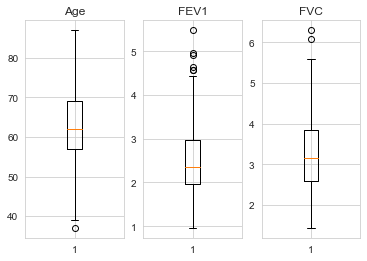

In [143]:
fig, axs = plt.subplots(1,3)

axs[0].boxplot(df1.Age)
axs[0].set_title('Age')

axs[1].boxplot(df1.FEV1)
axs[1].set_title('FEV1')

axs[2].boxplot(df1.FVC)
axs[2].set_title("FVC")
plt.show()

##### Explanatory Data Analysis

In [144]:
df1.describe()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
count,454.000000,454.000000,454.00000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,3.092511,3.287952,2.51685,0.795154,0.059471,0.136564,0.055066,0.696035,0.171806,1.733480,0.074890,0.004405,0.017621,0.828194,0.004405,62.777533,0.151982
std,0.715817,0.872347,0.77189,0.531459,0.236766,0.343765,0.228361,0.460475,0.377628,0.707499,0.263504,0.066299,0.131715,0.377628,0.066299,8.449634,0.359400
min,1.000000,1.440000,0.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000
25%,3.000000,2.600000,1.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,3.000000,3.160000,2.36000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,3.000000,3.840000,2.97750,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,8.000000,6.300000,5.48000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [146]:
# Stats for live and death after 1 yr patients
live = df1[df1['Death_1yr'] == 0]
death = df1[df1['Death_1yr'] == 1]

print('Death: {:d}, Live: {:d}'.format(len(death), len(live)))
print("1 year death: {:.2f}% out of 454 patients".format(np.mean(df1.Death_1yr)*100))


Death: 69, Live: 385
1 year death: 15.20% out of 454 patients


##### How many patients died in 1 Year?

Out of the 454 patients, 69 did not survive 1 year after their operations, which is 15.20% of the total sample size.

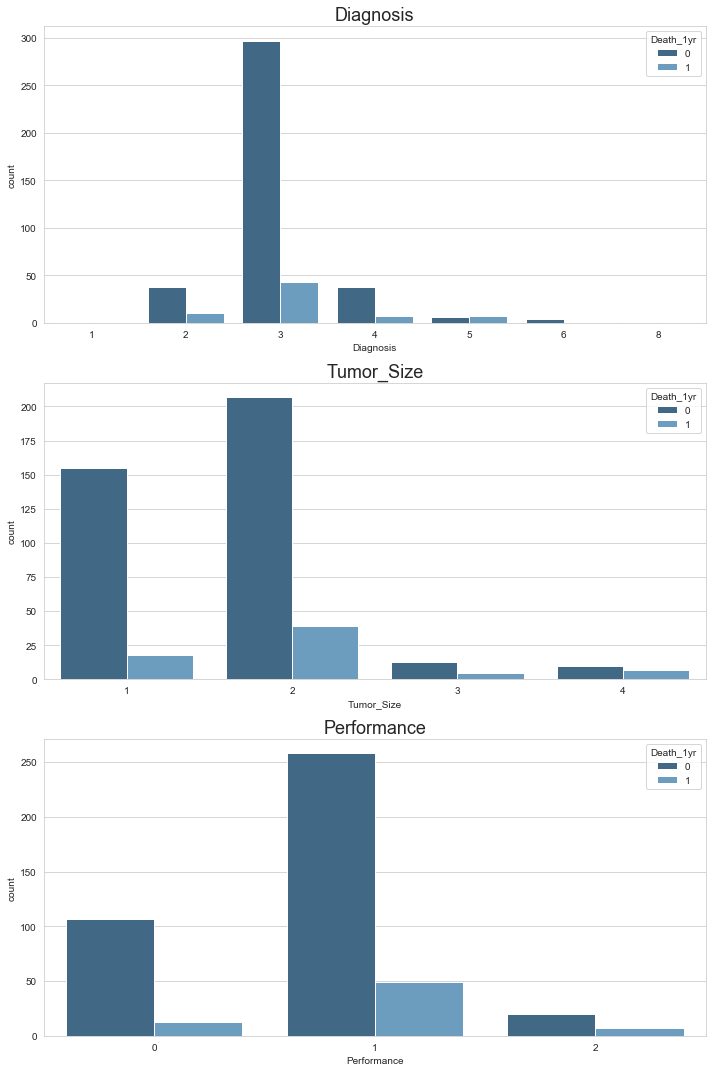

In [147]:
# Count plots of Diagnosis, Tumor_Size, Performance with difference of live and death data

fig, axes = plt.subplots(3,1,figsize=(10,15))

sns.countplot(x='Diagnosis', hue='Death_1yr', data=df1, palette='Blues_d', ax=axes[0]).set_title('Diagnosis', fontsize=18)
sns.countplot(x='Tumor_Size', hue='Death_1yr', data=df1, palette='Blues_d', ax=axes[1]).set_title('Tumor_Size', fontsize=18)
sns.countplot(x='Performance', hue='Death_1yr', data=df1, palette='Blues_d', ax=axes[2]).set_title('Performance', fontsize=18)

plt.tight_layout()

##### Analysis of live and death patients for Diagnosis, Tumor_Size, and Performance

For Diagnosis, the large majority of patients are in category 3. The other categories are relatively small while category 4, 2, and 5 should be considered for their counts in that order. The proportion of live to dead at a glance seems to be similar for the diagnosis categories except for 5, where the death count is higher than the live count, which indicates this diagnosis is more fatal than the others even with surgery.

For Tumor Size, categories 1 and 2 are the majority. At a glance, the proportion of the dead to live generally increases with the tumor size ranging from 1 to 4, indicating the higher tumor size correlates to higher chance of death even with surgery.

For Performance, categories are 1, 0, 2 in decreasing order of count. Performance 0 category reveals low death count and good proportion to live data, which makes sense since on the Zubrod scale 0 is good and 2 is poor.

##### Correlations

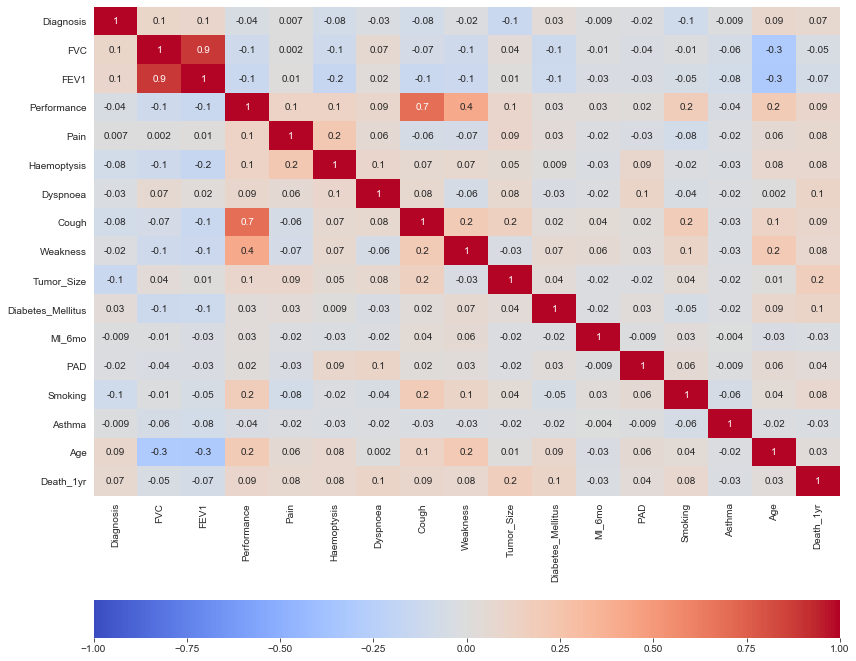

In [167]:
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(),annot=True,fmt='.1g',vmin=-1,vmax=1,center=0,cmap='coolwarm',cbar_kws= {'orientation': 'horizontal'})
plt.tight_layout()

From looking at the heatmap, one can see a strong positive correlation between FVC and FEV1. The correlation coefficient calculated for FVC and FEV1 is 0.9, which is very strong. On the other hand, Age's correlation with FVC and FEV1 are about -0.3 for both, but the data points are more spread out. The mild negative trend for age against the other two features makes intuitive sense as it would be expected that as you get older, your lung capacity decreases. The performance has positive correlation to weakness and cough which makes sense that when one is weak, performance goes down. 

##### Summary of EDA
 - Out of the 454 patients, 69 died and 385 lived the 1 year period after surgery. So, 15.20% of patients died.
 - Majority of patients were categorized as diagnosis code 3. The proportion of live to dead is similar for the diagnosis codes. For tumor size, most of the patients are in category 1 and 2, and the data presents a trend of more proportion of dead as tumor size increases. For performance, the trend observed is more proportion of dead as performance zubrod score increases, which means patient performance decreases.
 - As Age increases, the FEV1 and FVC decrease with correlations of -0.31 and -0.30, respectively. FEV1 and FVC are highly correlated with a value of 0.89.

##### Predictive Modeling

The data set is imbalanced and mostly live patients (85%), just predicting all live patients will give a high accuracy score ~85%. So for the model, accuracy will not be a good score method and instead I will look at average precision score, which summarizes the precision-recall curve. Also for the imbalance, there are couple options including downsampling or upsampling.

In [238]:
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score, roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [224]:
y = df1['Death_1yr']  #target variable
x = df1.drop(['Death_1yr'],axis=1) #attributes except target variable

In [410]:
def model_report(model, X, y):
    """Takes in classifier model with data and displays scores and confusion matrix."""

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1111, stratify=y)
    
    clf = model()
    
    classifier = clf.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_score = classifier.predict_proba(X_test)
    
    class_names = ['Live', 'Death']
    
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Average Precision: {:.2f}'.format(average_precision_score(y_test, y_pred)))
    print(classification_report(y_test, y_pred, target_names=class_names))
    np.set_printoptions(precision=2)
    
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: \n {}".format(cnf_matrix))
    
    fpr= dict()
    tpr= dict()
    for i in range(0,2):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_score[:,i], pos_label=i)
        
    print('AUC: {:.2f}'.format(auc(fpr[0],tpr[0])))  
    plt.figure()    
    lw = 2
    plt.plot(fpr[0], tpr[0], color='darkorange',lw=lw)
    plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

C:\Users\ssghu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ssghu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
No handles with labels found to put in legend.


Accuracy: 0.85
Average Precision: 0.15
              precision    recall  f1-score   support

        Live       0.85      1.00      0.92       116
       Death       0.00      0.00      0.00        21

    accuracy                           0.85       137
   macro avg       0.42      0.50      0.46       137
weighted avg       0.72      0.85      0.78       137

Confusion Matrix: 
 [[116   0]
 [ 21   0]]
AUC: 0.60


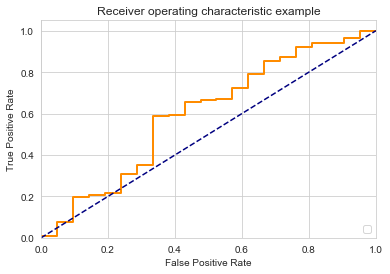

In [411]:
# Logistic Regression
model_report(LogisticRegression,x,y)

No handles with labels found to put in legend.


Accuracy: 0.15
Average Precision: 0.15
              precision    recall  f1-score   support

        Live       0.50      0.01      0.02       116
       Death       0.15      0.95      0.26        21

    accuracy                           0.15       137
   macro avg       0.32      0.48      0.14       137
weighted avg       0.45      0.15      0.05       137

Confusion Matrix: 
 [[  1 115]
 [  1  20]]
AUC: 0.62


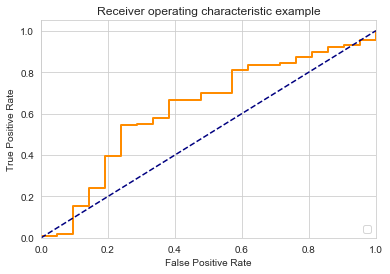

In [412]:
# Gaussian Naive Baeyes
model_report(GaussianNB,x,y)

C:\Users\ssghu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
No handles with labels found to put in legend.


Accuracy: 0.85
Average Precision: 0.15
              precision    recall  f1-score   support

        Live       0.85      1.00      0.92       116
       Death       0.00      0.00      0.00        21

    accuracy                           0.85       137
   macro avg       0.42      0.50      0.46       137
weighted avg       0.72      0.85      0.78       137

Confusion Matrix: 
 [[116   0]
 [ 21   0]]
AUC: 0.64


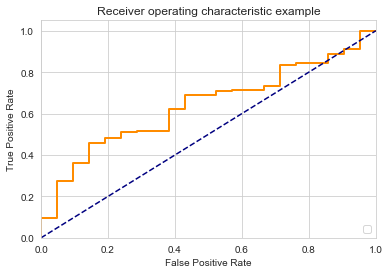

In [413]:
# Multinomial Navie Baeyes
model_report(MultinomialNB,x,y)

No handles with labels found to put in legend.


Accuracy: 0.84
Average Precision: 0.15
              precision    recall  f1-score   support

        Live       0.85      0.99      0.91       116
       Death       0.00      0.00      0.00        21

    accuracy                           0.84       137
   macro avg       0.42      0.50      0.46       137
weighted avg       0.72      0.84      0.77       137

Confusion Matrix: 
 [[115   1]
 [ 21   0]]
AUC: 0.65


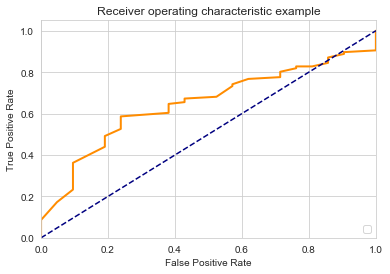

In [414]:
# Random Forest
model_report(RandomForestClassifier,x,y)

##### Upscaling the Minority class

In [415]:
# Separate majority and minority classes
df_majority = df1[df1.Death_1yr ==0]
df_minority = df1[df1.Death_1yr ==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=385,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Death_1yr.value_counts()

1    385
0    385
Name: Death_1yr, dtype: int64

In [416]:
# Separate input features (X) and target variable (y)
y_upsample = df_upsampled.Death_1yr
X_upsample = df_upsampled.drop('Death_1yr', axis=1)

C:\Users\ssghu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
No handles with labels found to put in legend.


Accuracy: 0.65
Average Precision: 0.60
              precision    recall  f1-score   support

        Live       0.63      0.72      0.67       116
       Death       0.67      0.57      0.61       115

    accuracy                           0.65       231
   macro avg       0.65      0.64      0.64       231
weighted avg       0.65      0.65      0.64       231

Confusion Matrix: 
 [[84 32]
 [50 65]]
AUC: 0.74


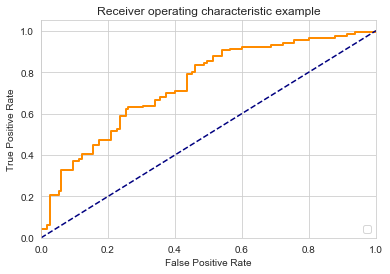

In [417]:
# Logistic Regression
model_report(LogisticRegression,X_upsample,y_upsample)

No handles with labels found to put in legend.


Accuracy: 0.50
Average Precision: 0.50
              precision    recall  f1-score   support

        Live       1.00      0.01      0.02       116
       Death       0.50      1.00      0.67       115

    accuracy                           0.50       231
   macro avg       0.75      0.50      0.34       231
weighted avg       0.75      0.50      0.34       231

Confusion Matrix: 
 [[  1 115]
 [  0 115]]
AUC: 0.76


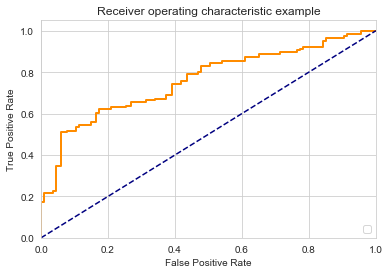

In [418]:
# Gaussian Naive Baeyes
model_report(GaussianNB,X_upsample,y_upsample)

No handles with labels found to put in legend.


Accuracy: 0.64
Average Precision: 0.59
              precision    recall  f1-score   support

        Live       0.63      0.71      0.66       116
       Death       0.66      0.57      0.61       115

    accuracy                           0.64       231
   macro avg       0.64      0.64      0.64       231
weighted avg       0.64      0.64      0.64       231

Confusion Matrix: 
 [[82 34]
 [49 66]]
AUC: 0.73


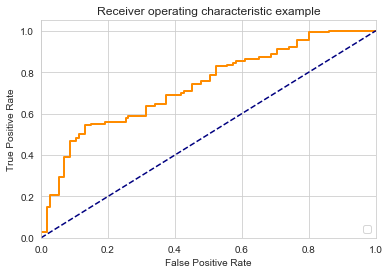

In [419]:
# Multinomial Naive Baeyes
model_report(MultinomialNB,X_upsample,y_upsample)

No handles with labels found to put in legend.


Accuracy: 0.96
Average Precision: 0.93
              precision    recall  f1-score   support

        Live       0.99      0.93      0.96       116
       Death       0.93      0.99      0.96       115

    accuracy                           0.96       231
   macro avg       0.96      0.96      0.96       231
weighted avg       0.96      0.96      0.96       231

Confusion Matrix: 
 [[108   8]
 [  1 114]]
AUC: 1.00


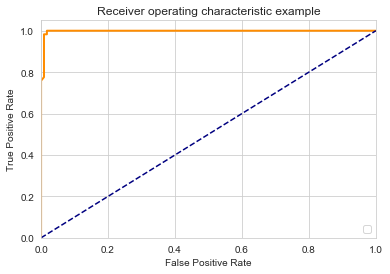

In [420]:
# Random Forest
model_report(RandomForestClassifier,X_upsample,y_upsample)